# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

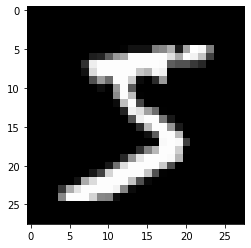

In [5]:
plt.imshow(X_train[0],cmap='gray')

In [6]:
y_train[0]

5

## Preprocessing the image data

In [7]:
image_height,image_width = 28,28

In [8]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

![NeuralNet](images/neural-net.png)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compile the model

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
784*512+512

401920

In [18]:
512*512+512

262656

In [19]:
512*10+10

5130

## Train the model

In [20]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 415us/step - loss: 0.1808 - accuracy: 0.9448 - val_loss: 0.0901 - val_accuracy: 0.9716
Epoch 2/20
60000/60000 [==============================] - 26s 427us/step - loss: 0.0800 - accuracy: 0.9747 - val_loss: 0.0806 - val_accuracy: 0.9762
Epoch 3/20
60000/60000 [==============================] - 28s 464us/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0810 - val_accuracy: 0.9774
Epoch 4/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0985 - val_accuracy: 0.9732
Epoch 5/20
60000/60000 [==============================] - 26s 434us/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0924 - val_accuracy: 0.9773
Epoch 6/20
60000/60000 [==============================] - 26s 436us/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0965 - val_accuracy: 0.9738
Epoch 7/20
60000/60000 [==============================]

## What is the accuracy of the model?

### Plot the accuracy of the training model

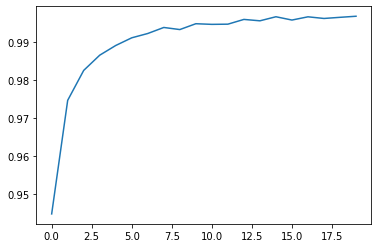

In [21]:
plt.plot(history.history['accuracy'])

### Plot the accuracy of training and validation set

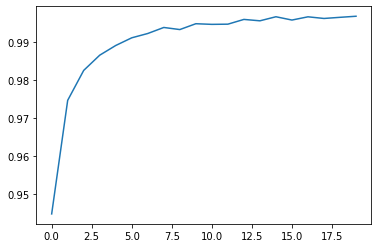

In [22]:
plt.plot(history.history['accuracy'])

### Accuracy of training and validation with loss

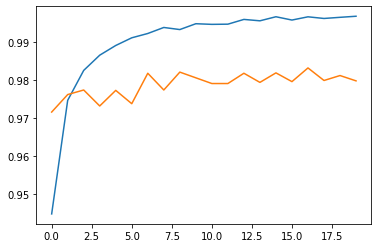

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

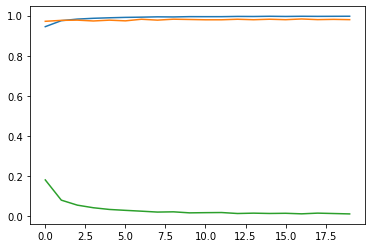

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluating the model

In [25]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 73us/step


In [26]:
score

[0.15116927369167787, 0.9797999858856201]

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons.
- What results do you get when trying to use another activation function?
- Try a new dataset with your own neural network and see what accuracy you get.

# Convolution Neural Network

## Import the libraries

In [27]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [30]:
batch_size = 128
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [32]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_5 (Dense)              (None, 10)              

In [33]:
history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 44s 734us/step - loss: 0.1523 - accuracy: 0.9534 - val_loss: 0.0478 - val_accuracy: 0.9855
Epoch 2/20
60000/60000 [==============================] - 44s 741us/step - loss: 0.0489 - accuracy: 0.9854 - val_loss: 0.0327 - val_accuracy: 0.9901
Epoch 3/20
60000/60000 [==============================] - 43s 723us/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0185 - val_accuracy: 0.9945
Epoch 4/20
60000/60000 [==============================] - 43s 709us/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0172 - val_accuracy: 0.9945
Epoch 5/20
60000/60000 [==============================] - 44s 725us/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0219 - val_accuracy: 0.9927
Epoch 6/20
60000/60000 [==============================] - 43s 713us/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0128 - val_accuracy: 0.9958
Epoch 7/20
60000/60000 [==============================] 

# Recall that when using neural networks we got good accuracy.

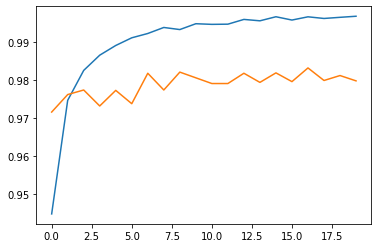

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Comparing this to using CNNs - the performance is far superior.

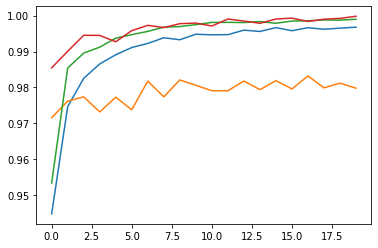

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])